In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/analytics/main/_static/data/commerce.csv")
pd.set_option('display.max_columns', None)
import seaborn as sns

In [3]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


In [17]:
# X = Feature Variable 
X = df[['Income']]

# y = Zielvariable
y = df["MntWines"]

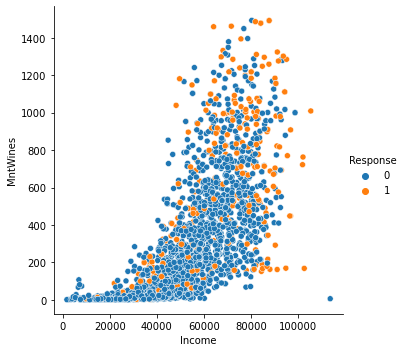

In [19]:
sns.relplot(x='Income', y='MntWines',data=df, hue="Response");

In [20]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
# Model coefficients
print('Coefficients: \n', "Intercept:", reg.intercept_, "\n Coefficient:", reg.coef_)

Coefficients: 
 Intercept: -309.9224386520122 
 Coefficient: [0.01198037]


In [25]:
# Prediction
y_pred = reg.predict(X_test)
y_pred

array([ 7.88821082e+02,  6.68849676e+02,  3.83345523e+02,  1.57168154e+02,
        3.91911487e+02,  6.60814148e+01,  2.01878887e+02,  2.73353764e+02,
        1.93420748e+02,  4.93313322e+02,  1.54017317e+02,  2.76157170e+02,
        6.06180370e+02,  6.10169833e+02,  1.22928261e+02,  3.55239580e+02,
        4.70071408e+02,  5.28311276e+01,  3.08863575e+02,  4.14578343e+02,
        4.97782000e+02,  5.52963575e+02,  7.40157172e+00,  4.51022623e+02,
        1.14374279e+02, -1.42110124e+01,  2.78529283e+02,  1.36753606e+02,
        6.30153087e+02,  1.52759378e+02, -3.94776087e+01,  3.60391138e+02,
        5.42636498e+02,  3.73497661e+02,  1.84567255e+02,  5.42328307e+01,
       -1.79968087e+01,  3.57467928e+02,  5.79835541e+02,  6.96875056e+01,
        2.84759074e+02,  1.33315241e+02, -1.77994625e+02,  3.62523644e+02,
       -5.85623351e+01,  6.01555948e+02,  6.19730167e+02,  2.54484684e+02,
        3.81404704e+02,  2.42396492e+02,  1.19693562e+02,  1.19660920e+01,
        2.03711884e+02,  

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test, y_pred)

0.5388801559581464

In [28]:
# pretty output
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.54


In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mean_squared_error(y_test, y_pred)

50242.968677069075

In [31]:
mean_squared_error(y_test, y_pred, squared=False)

224.1494338093877

In [32]:
# Create a new MntWines value
X_new = pd.DataFrame({"MntWines": [50000]})

In [33]:
reg.predict(X_new)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MntWines
Feature names seen at fit time, yet now missing:
- Income

  warnings.warn(message, FutureWarning)


array([289.09596731])

In [34]:
from pathlib import Path

# show current working directory
Path.cwd()

PosixPath('/Users/rafaela/test')

In [35]:
from joblib import dump, load

# store model in current working directory with Path()
dump(reg, Path('my_linear_model.joblib'))

['my_linear_model.joblib']

In [36]:
# load model and save it as reg2 
reg2 = load(Path('my_linear_model.joblib')) 

In [37]:
# make a prediction
reg2.predict(X_new)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MntWines
Feature names seen at fit time, yet now missing:
- Income

  warnings.warn(message, FutureWarning)


array([289.09596731])

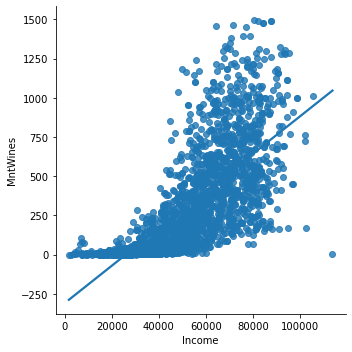

In [42]:
# Plot regression line 
sns.lmplot(data=df, x="Income", y="MntWines", ci=False);